In [1]:
import keras
import tensorflow as tf
import os, sys
os.environ["CUDA_VISIBLE_DEVICES"]="1"
%matplotlib inline

Using TensorFlow backend.


In [2]:
print("python:{}, keras:{}, tensorflow: {}".format(sys.version, keras.__version__, tf.__version__))

python:3.5.2 (default, Nov 17 2016, 17:05:23) 
[GCC 5.4.0 20160609], keras:2.0.3, tensorflow: 1.0.1


In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

in_out_neurons = 2
hidden_neurons = 30

model = Sequential()
model.add(LSTM(hidden_neurons, return_sequences=False,
               input_shape=(None, in_out_neurons)))
model.add(Dense(in_out_neurons, input_dim=hidden_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                3960      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 62        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 4,022
Trainable params: 4,022
Non-trainable params: 0
_________________________________________________________________


In [33]:
import pandas as pd  
from random import random

flow = (list(range(1, 10, 1)) + list(range(10, 1, -1))) * 1000  
pdata = pd.DataFrame({"a" : flow, "b" : flow})  
pdata.b = pdata.b.shift(9)  
data = pdata.iloc[10:] # * random() # add random noise

In [34]:
data.shape

(17990, 2)

In [14]:
import numpy as np

def _load_data(data, n_prev=100):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data) - n_prev):
        docX.append(data.iloc[i:i + n_prev].as_matrix())
        docY.append(data.iloc[i + n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = round(len(df) * (1 - test_size))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

In [35]:
# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [36]:
X_train.shape, X_test.shape

((16091, 100, 2), (1699, 100, 2))

In [37]:
# train the model
# batch_size should be appropriate to memory size
model.fit(X_train, y_train, batch_size=450, epochs=10, validation_split=0.05)  

Train on 15286 samples, validate on 805 samples
Epoch 1/10
15286/15286 [==============================] - 9s - loss: 12.5015 - val_loss: 7.4020
Epoch 2/10
15286/15286 [==============================] - 8s - loss: 5.3535 - val_loss: 3.9060
Epoch 3/10
15286/15286 [==============================] - 8s - loss: 3.0665 - val_loss: 2.2896
Epoch 4/10
15286/15286 [==============================] - 8s - loss: 1.8133 - val_loss: 1.4034
Epoch 5/10
15286/15286 [==============================] - 8s - loss: 0.8798 - val_loss: 0.6099
Epoch 6/10
15286/15286 [==============================] - 8s - loss: 0.4909 - val_loss: 0.3293
Epoch 7/10
15286/15286 [==============================] - 8s - loss: 0.2631 - val_loss: 0.1679
Epoch 8/10
15286/15286 [==============================] - 8s - loss: 0.1553 - val_loss: 0.1014
Epoch 9/10
15286/15286 [==============================] - 8s - loss: 0.1058 - val_loss: 0.0850
Epoch 10/10
15286/15286 [==============================] - 8s - loss: 0.0984 - val_loss: 0.0519


In [44]:
y_train[0]

array([ 3.,  8.])

In [38]:
predicted = model.predict(X_test)  
rmse = np.sqrt(((predicted - y_test) ** 2).mean(axis=0))

In [49]:
predicted.shape

(1699, 2)

In [48]:
datat = data.transpose()
([datat[col].tolist() for col in datat])[:5]

[[9.0, 2.0], [8.0, 3.0], [7.0, 4.0], [6.0, 5.0], [5.0, 6.0]]

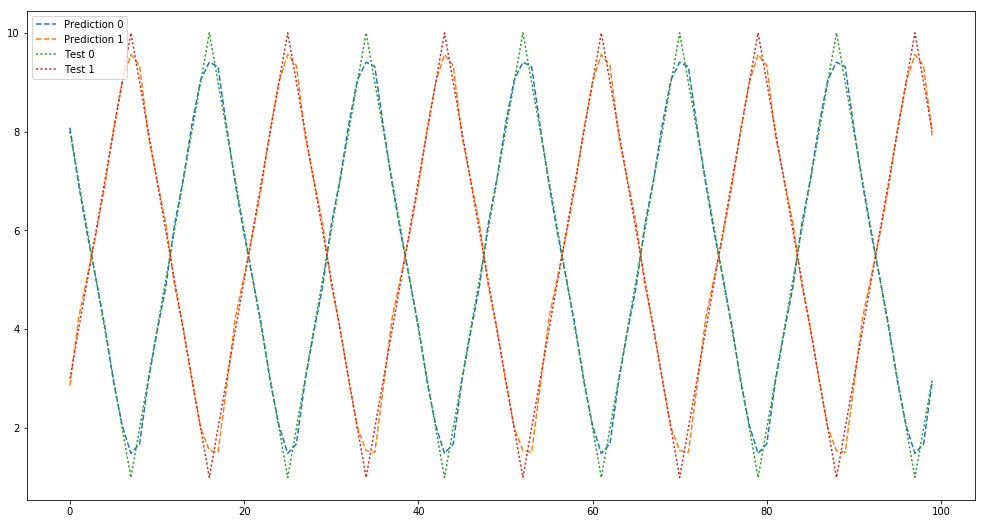

In [41]:
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (17, 9)
plt.plot(predicted[:100][:, 0],"--")
plt.plot(predicted[:100][:, 1],"--")
plt.plot(y_test[:100][:, 0],":")
plt.plot(y_test[:100][:, 1],":")
plt.legend(["Prediction 0", "Prediction 1", "Test 0", "Test 1"])